# 1. 判断输入多边形是否能够平铺

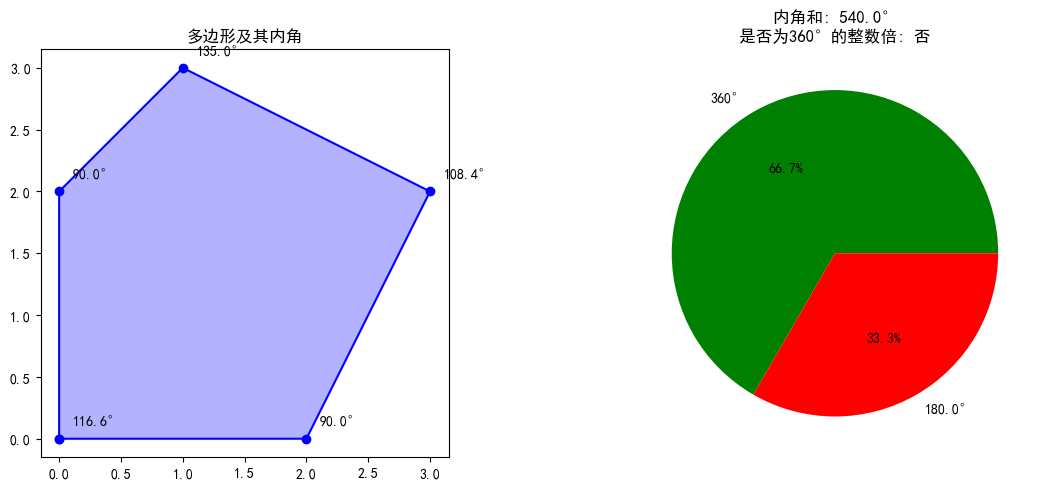

该多边形不可以平铺平面。


In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算多边形的内角
def calculate_internal_angles(vertices):
    n = len(vertices)
    angles = []
    for i in range(n):
        p1 = vertices[i]
        p2 = vertices[(i + 1) % n]
        p3 = vertices[(i + 2) % n]

        # 计算每一对相邻边的夹角
        v1 = np.array([p1[0] - p2[0], p1[1] - p2[1]])
        v2 = np.array([p3[0] - p2[0], p3[1] - p2[1]])

        cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
        angle = np.arccos(cos_angle)
        angles.append(np.degrees(angle))
    
    return angles

# 判断多边形是否能平铺并可视化过程
def can_tile_polygon(vertices):
    angles = calculate_internal_angles(vertices)
    
    # 计算内角之和
    angle_sum = sum(angles)
    
    # 可视化多边形和内角
    plt.figure(figsize=(12, 5))
    
    # 左侧绘制多边形
    plt.subplot(121)
    vertices_array = np.array(vertices)
    vertices_closed = np.vstack([vertices_array, vertices_array[0]])  # 连接首尾点
    plt.plot(vertices_closed[:, 0], vertices_closed[:, 1], 'b-', marker='o')
    plt.fill(vertices_array[:, 0], vertices_array[:, 1], 'b', alpha=0.3)
    
    # 标注内角
    for i, (x, y) in enumerate(vertices):
        plt.annotate(f'{angles[i]:.1f}°', (x, y), 
                    xytext=(10, 10), textcoords='offset points')
    
    plt.title('多边形及其内角')
    plt.gca().set_aspect('equal', adjustable='box')
    
    # 右侧绘制内角和分析
    plt.subplot(122)
    plt.pie([360, angle_sum-360] if angle_sum > 360 else [angle_sum, 360-angle_sum],
            labels=[f'360°', f'{abs(angle_sum-360):.1f}°'],
            colors=['green', 'red'],
            autopct='%1.1f%%')
    plt.title(f'内角和: {angle_sum:.1f}°\n是否为360°的整数倍: {"是" if np.isclose(angle_sum % 360, 0) else "否"}')
    
    plt.tight_layout()
    plt.show()
    
    return np.isclose(angle_sum % 360, 0)

# 示例：判断一个五边形
polygon1 = [(0, 0), (2, 0), (3, 2), (1, 3), (0, 2)]
result = can_tile_polygon(polygon1)
print(f"该多边形{'可以' if result else '不可以'}平铺平面。")


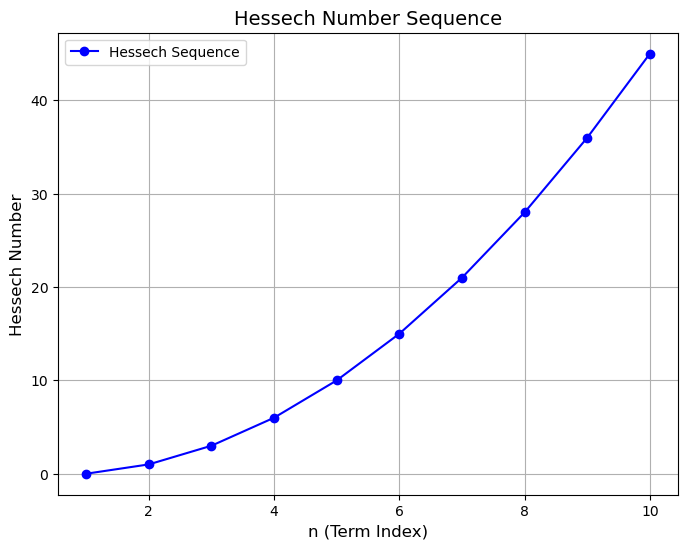